In [73]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('./data/NWSD.xlsx')

In [8]:
data.columns

Index(['INDEX_NR', 'INCIDENT_DATE', 'INCIDENT_MONTH', 'INCIDENT_YEAR', 'TIME',
       'TIME_OF_DAY', 'AIRPORT_ID', 'AIRPORT', 'AIRPORT_LATITUDE',
       'AIRPORT_LONGITUDE',
       ...
       'ENROUTE_STATE', 'NR_INJURIES', 'NR_FATALITIES', 'COMMENTS',
       'REPORTED_NAME', 'REPORTED_TITLE', 'SOURCE', 'PERSON', 'LUPDATE',
       'TRANSFER'],
      dtype='object', length=101)

In [108]:
data.select_dtypes(include='object').columns

Index(['INCIDENT_DATE', 'TIME', 'TIME_OF_DAY', 'AIRPORT_ID', 'AIRPORT',
       'AIRPORT_LATITUDE', 'AIRPORT_LONGITUDE', 'RUNWAY', 'STATE', 'FAAREGION',
       'LOCATION', 'OPID', 'OPERATOR', 'REG', 'FLT', 'AIRCRAFT', 'AMA', 'AMO',
       'AC_CLASS', 'TYPE_ENG', 'PHASE_OF_FLIGHT', 'SKY', 'PRECIPITATION',
       'DAMAGE_LEVEL', 'OTHER_SPECIFY', 'EFFECT', 'EFFECT_OTHER',
       'BIRD_BAND_NUMBER', 'SPECIES_ID', 'SPECIES', 'REMARKS', 'WARNED',
       'NUM_SEEN', 'NUM_STRUCK', 'SIZE', 'ENROUTE_STATE', 'COMMENTS',
       'REPORTED_NAME', 'REPORTED_TITLE', 'SOURCE', 'PERSON', 'LUPDATE'],
      dtype='object')

In [ ]:
data['SPECIES'].value_counts(dropna=False)

SPECIES
Unknown bird - small     52197
Unknown bird - medium    38937
Unknown bird             30529
Mourning dove            16274
Barn swallow             10818
                         ...  
Medium egret                 1
Domestic sheep               1
Florida bonneted bat         1
Lesser bulldog bat           1
Turkeys                      1
Name: count, Length: 928, dtype: int64

In [24]:
# data[data['SPECIES_ID'] == 'YI001' ]['SPECIES']
data[data['SPECIES'] == 'White-winged swallow' ]['SPECIES_ID']

258632    YI015
259810    YI015
Name: SPECIES_ID, dtype: object

In [59]:
data['SPECIES_ID'].unique()
# 종 코드가 숫자로 시작하는 건 포유류/파충류임

array(['UNKBM', 'UNKBS', 'Z6007', 'UNKBL', 'ZT1', 'NE1', 'O2205', 'K5114',
       'O2111', 'J2204', 'K3201', 'K', 'K33', 'YL001', 'ZX3', 'J21', 'M7',
       'NE114', 'J22', 'YM1102', 'YM402', 'I11', 'K1002', 'NE104', '1G11',
       'K3302', 'YI', 'YI001', 'O22', 'N5111', 'J2148', 'K2001', 'N6001',
       'I13', 'Z4', 'YM11', 'NE2', 'R1101', 'N5122', 'K1', 'ZT002', 'N6',
       'R', 'I1102', 'J2109', 'N6039', 'ZX017', 'R2004', 'YI005', 'S5213',
       '1F11', 'H6003', 'YI012', 'NE214', 'J', 'L4201', '1C2', 'R2001',
       'Z6', 'H2002', 'I1301', 'NE101', 'YI010', 'ZT001', 'J2118',
       'J2202', 'H51', 'ZT301', 'O2211', 'ZX505', 'J2107', 'I1306',
       'T1002', 'ZX000', 'YM1201', 'K5102', 'ZY1', 'O2212', '1UNKM',
       'Z5101', 'I1302', 'Z5201', 'NE120', 'N6028', 'H4105', 'J2108',
       'ZX018', 'M4001', 'X6101', 'ZT101', 'N6002', 'YH004', '1F32',
       '1F61', 'H2', '2B1', 'YL101', 'K1001', 'YI009', 'L6001', '2A',
       '1G51', 'ZT2', 'ZY101', 'N6011', 'N51', 'K3101', 'R2007', 'O

In [ ]:
# data[data['SPECIES_ID'].astype(str).str.match(r'^\d')]['SPECIES_ID'].value_counts()    # 숫자로 시작하는 코드 => 포유류/파충류. 13202건
data[data['SPECIES_ID'].astype(str).str.match(r'^\D')]['SPECIES_ID'].value_counts()

13202

In [54]:
data[data['SPECIES_ID'] == 'O2205' ]['SPECIES']
# data[data['SPECIES'] == 'White-winged swallow' ]['SPECIES_ID']

14        Mourning dove
125       Mourning dove
240       Mourning dove
303       Mourning dove
376       Mourning dove
              ...      
317535    Mourning dove
317540    Mourning dove
317547    Mourning dove
317595    Mourning dove
317599    Mourning dove
Name: SPECIES, Length: 16274, dtype: object

In [90]:
birds = data[data['SPECIES_ID'].astype(str).str.match(r'\D')]['SPECIES'].unique()
birds = np.char.lower(birds.astype(str))

In [ ]:
# pd.DataFrame(birds).to_csv("birds.csv", index=False, header=False)

In [ ]:
not_in_list = pd.read_csv("./data/not_in_list.csv")

In [97]:
not_in_list['name']

0      unknown bird - medium
1       unknown bird - small
2       unknown bird - large
3                 blackbirds
4                      gulls
               ...          
245      mugimaki flycatcher
246                  towhees
247             common snipe
248           whiskered tern
249                  turkeys
Name: name, Length: 250, dtype: object

In [101]:
data[data['SPECIES'] == 'Mugimaki flycatcher']   # 노랑딱새

,INDEX_NR,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME,TIME_OF_DAY,AIRPORT_ID,AIRPORT,AIRPORT_LATITUDE,AIRPORT_LONGITUDE,...,ENROUTE_STATE,NR_INJURIES,NR_FATALITIES,COMMENTS,REPORTED_NAME,REPORTED_TITLE,SOURCE,PERSON,LUPDATE,TRANSFER
312339,1612688,2024-10-04,10,2024,22:33,Night,RKSI,INCHEON INTL,37.469075,126.450517,...,NaN,NaN,NaN,NOTE: NUMBER STRUCK NOT REPORTED ASSUME 1.,REDACTED,REDACTED,FAA Form 5200-7-E,Air Transport Operations,2025-02-26,0


In [109]:
# 인천? => ID RKSI
data[data['AIRPORT_ID'] == 'RKSI']['DAMAGE_LEVEL']

40704      N
42140      N
45585      N
46066      N
46417      N
47092      N
57333      N
57506      N
57770      N
58877      N
67250      N
75255      N
77171      N
78908      M
83147      N
84639      N
96396      N
97107      N
99095      S
101738     N
106119     N
111739     N
115893     N
116915     N
128154     N
133130     N
136857     N
151017     N
161205     N
167007     N
178017     N
221456     N
221529     N
222112    M?
230588     N
239722     N
242375     N
244049     N
252989     N
253069     N
253145     N
254711     N
258373     N
259090     N
267541     N
312339     N
Name: DAMAGE_LEVEL, dtype: object

In [103]:
data[data['SPECIES'] == 'Mugimaki flycatcher']['STATE']    # FN
data[data['STATE'] == 'FN']

,INDEX_NR,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME,TIME_OF_DAY,AIRPORT_ID,AIRPORT,AIRPORT_LATITUDE,AIRPORT_LONGITUDE,...,ENROUTE_STATE,NR_INJURIES,NR_FATALITIES,COMMENTS,REPORTED_NAME,REPORTED_TITLE,SOURCE,PERSON,LUPDATE,TRANSFER
419,608753,1991-01-18,1,1991,NaN,Day,MROC,JUAN SANTAMARIA INTL,9.993861,-84.208806,...,NaN,NaN,NaN,/Legacy Record 100513/,REDACTED,REDACTED,FAA Form 5200-7,Pilot,2007-06-26,0
664,609042,1995-04-18,4,1995,NaN,NaN,MROC,JUAN SANTAMARIA INTL,9.993861,-84.208806,...,NaN,NaN,NaN,/Legacy Record 100802/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,2007-12-20,0
838,609254,1990-06-13,6,1990,NaN,NaN,TLPL,HEWANORRA ST LUCIA,13.733194,-60.952597,...,NaN,NaN,NaN,SOURCE FAA 3830 BIRD STRIKE/INCID REPT /Lega...,REDACTED,REDACTED,Other,Pilot,1999-03-12,0
852,609268,1990-04-28,4,1990,NaN,Night,MMGL,MIGUEL HIDALGO Y COSTILLA GUADALAJARA INTL,20.5218,-103.311167,...,NaN,NaN,NaN,/Legacy Record 101028/,REDACTED,REDACTED,FAA Form 5200-7,NaN,1999-03-09,0
934,609370,1995-05-24,5,1995,NaN,NaN,MROC,JUAN SANTAMARIA INTL,9.993861,-84.208806,...,NaN,NaN,NaN,/Legacy Record 101131/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,2007-12-20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317224,1623450,2024-11-13,11,2024,07:22,Day,MDST,SANTIAGO CIBAO INTL,19.406092,-70.604689,...,NaN,NaN,NaN,NaN,REDACTED,REDACTED,FAA Form 5200-7-E,Airport Operations,2025-04-11,0
317243,1623472,2024-11-14,11,2024,07:06,Dawn,MROC,JUAN SANTAMARIA INTL,9.993861,-84.208806,...,NaN,NaN,NaN,NaN,REDACTED,REDACTED,FAA Form 5200-7-E,Pilot,2025-04-11,0
317336,1623760,2024-11-02,11,2024,09:00,Day,MUGM,GUANTANAMO LEEWARD POINT AIRPORT,N19°54.39',W75°12.42',...,NaN,NaN,NaN,NaN,REDACTED,REDACTED,FAA Form 5200-7-E,Air Transport Operations,2025-04-14,0
317464,1623961,2024-11-29,11,2024,,Dusk,TUPJ,T B LETTSOME INTL,18.4333,-64.5333,...,NaN,NaN,NaN,NaN,REDACTED,REDACTED,FAA Form 5200-7-E,Pilot,2025-04-14,0


<Axes: >

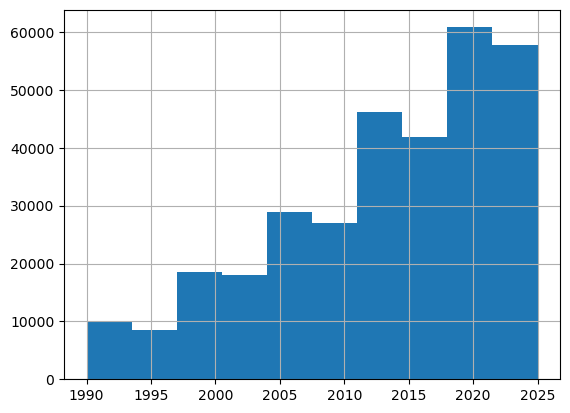

In [67]:
data['INCIDENT_YEAR'].hist()

In [14]:
data['SIZE'].value_counts(dropna=False)

SIZE
Small     196000
Medium     71136
NaN        30972
Large      19516
Name: count, dtype: int64

In [12]:
data['DAMAGE_LEVEL'].value_counts(dropna=False)
# data['INDICATED_DAMAGE'].value_counts(dropna=False)

DAMAGE_LEVEL
N      184480
NaN    112318
M        8676
M?       7724
S        4338
D          88
Name: count, dtype: int64